In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "drive/MyDrive/prithviai/Data"

raw  val


# Include Libraries

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score
import pickle
from glob import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Data Loading and Pre-Processing

## Loading Files

In [4]:
def Pre_processing(path):
  total_files = []
  for home,dir,files in os.walk(path):
    for each_file in files:
      if each_file.endswith('.txt'):
        with open(os.path.join(home,each_file), 'r') as f:
          lines = f.read()
          sp = lines.split(';\n')
          total = []
          for i in range(len(sp)):
            j = sp[i].split(',')
            total.append(j)
          total_files = total_files + total
  return total_files

In [5]:
def get_subdir(path):
  total = []
  paths = glob(path + "/*/*/")
  for path in paths:
    print(str(path))
    total.append(Pre_processing(str(path)))
  return total

## Convert To Pandas Dataframe

In [6]:
def transform(data):
    data = data[:-1]
    data = pd.DataFrame(data, columns = ['Subject-id', 'Activity Label', 'Timestamp', 'x', 'y', 'z'])
    return data

In [7]:
def mandatory(path):
  ans = get_subdir(path)
  total = []
  for i in ans:
    total = total + i
  train = transform(total)
  return train

In [8]:
def convert(data):

  data['Timestamp'] = pd.to_numeric(data['Timestamp'])
  data['Subject-id'] = pd.to_numeric(data['Subject-id'])
  data['x'] = pd.to_numeric(data['x'])
  data['y'] = pd.to_numeric(data['y'])
  data['z'] = pd.to_numeric(data['z'])
  data = data.dropna(subset = ['Subject-id','Timestamp', 'Activity Label','x', 'y', 'z'])
  label = data['Activity Label'].unique()


  l={}
  n=0
  for i in label:
      l[i] = n+1
      n+=1

  data['Activity Label'] = data['Activity Label'].apply(lambda x: l[x])
  return data

In [9]:
train_path = 'drive/MyDrive/prithviai/Data/raw/train/'
train = mandatory(train_path)


drive/MyDrive/prithviai/Data/raw/train/phone/gyro/
drive/MyDrive/prithviai/Data/raw/train/phone/accel/
drive/MyDrive/prithviai/Data/raw/train/watch/accel/
drive/MyDrive/prithviai/Data/raw/train/watch/gyro/


## Data Visulization

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575089 entries, 0 to 5575088
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Subject-id      object
 1   Activity Label  object
 2   Timestamp       object
 3   x               object
 4   y               object
 5   z               object
dtypes: object(6)
memory usage: 255.2+ MB


In [11]:
train.shape

(5575089, 6)

In [12]:
print(train.isnull().values.any())

True


In [13]:
print(train['Activity Label'].value_counts())

P    326432
M    322790
K    319861
A    316410
L    316264
H    315551
I    312049
C    310189
O    309299
J    307813
S    306874
D    305053
Q    305052
E    304954
R    304814
G    304798
F    297731
B    289076
Name: Activity Label, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


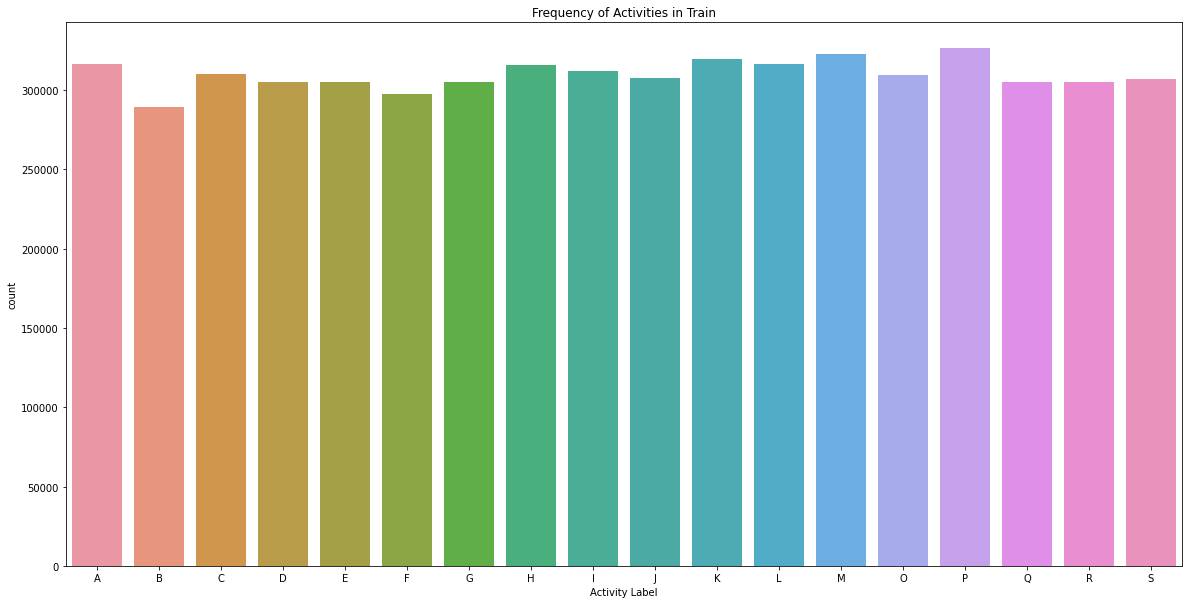

In [14]:
plt.figure(figsize = (20,10))
sns.countplot(train['Activity Label'])
plt.xlabel('Activity Label')
plt.ylabel('count')
plt.title('Frequency of Activities in Train')
plt.show()

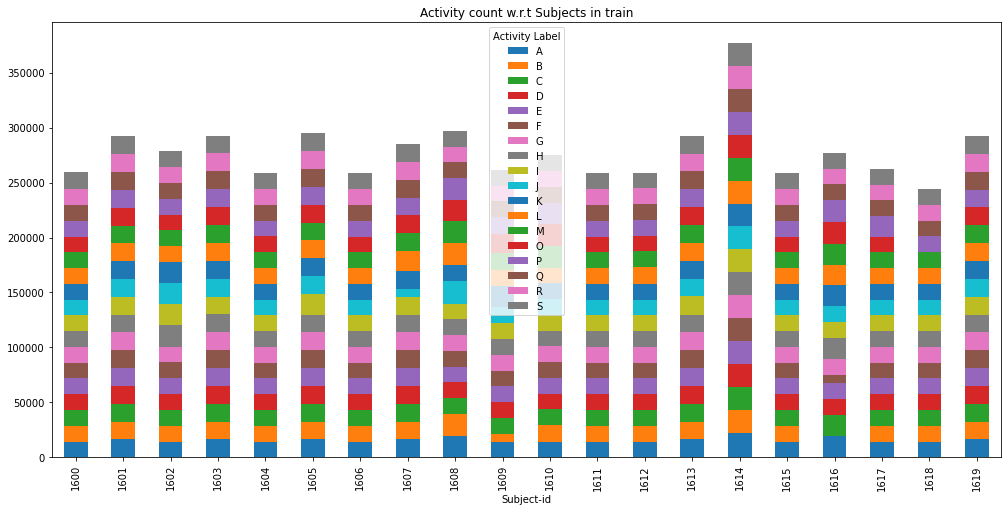

In [15]:
stack_group = train.groupby(['Subject-id','Activity Label']).size().unstack()
stack_group.plot(kind='bar',stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in train')
plt.show()

In [16]:
test_path = 'drive/MyDrive/prithviai/Data/raw/test/'
test = mandatory(test_path)


drive/MyDrive/prithviai/Data/raw/test/watch/accel/
drive/MyDrive/prithviai/Data/raw/test/watch/gyro/
drive/MyDrive/prithviai/Data/raw/test/phone/gyro/
drive/MyDrive/prithviai/Data/raw/test/phone/accel/


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4266386 entries, 0 to 4266385
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Subject-id      object
 1   Activity Label  object
 2   Timestamp       object
 3   x               object
 4   y               object
 5   z               object
dtypes: object(6)
memory usage: 195.3+ MB


In [18]:
print(test.isnull().values.any())

True


In [19]:
print(test['Activity Label'].value_counts())

E    254010
K    248869
Q    247684
G    244279
B    243794
S    242737
R    242200
D    241924
A    238685
I    234942
F    233184
O    231527
M    230931
H    228832
C    228180
L    225801
P    225440
J    223312
Name: Activity Label, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


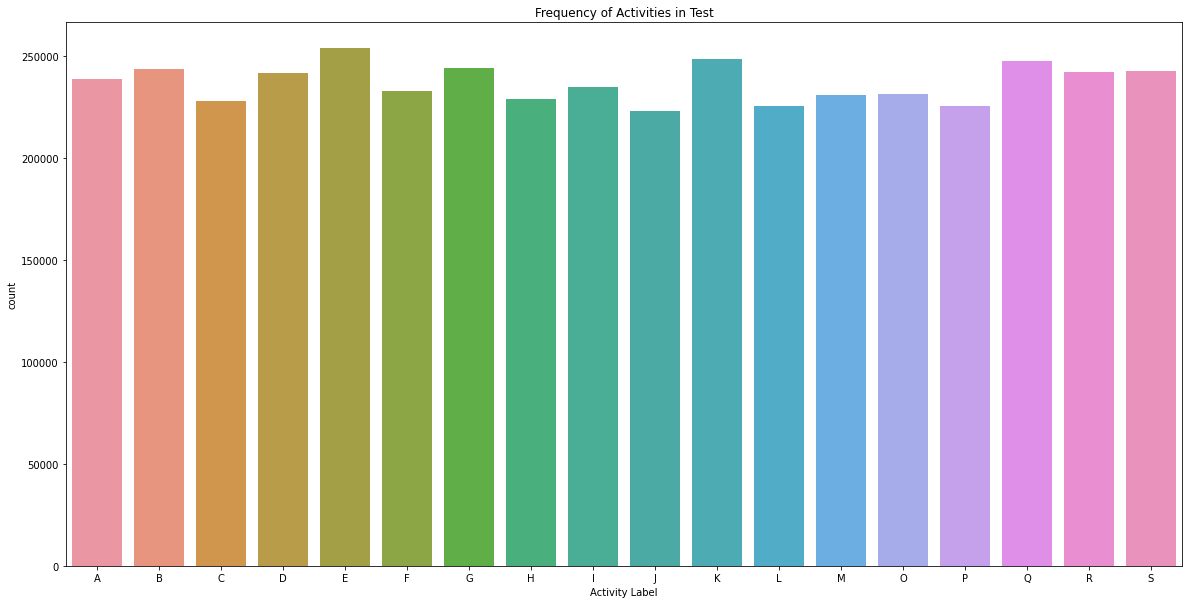

In [20]:
plt.figure(figsize = (20,10))
sns.countplot(test['Activity Label'])
plt.xlabel('Activity Label')
plt.ylabel('count')
plt.title('Frequency of Activities in Test')
plt.show()

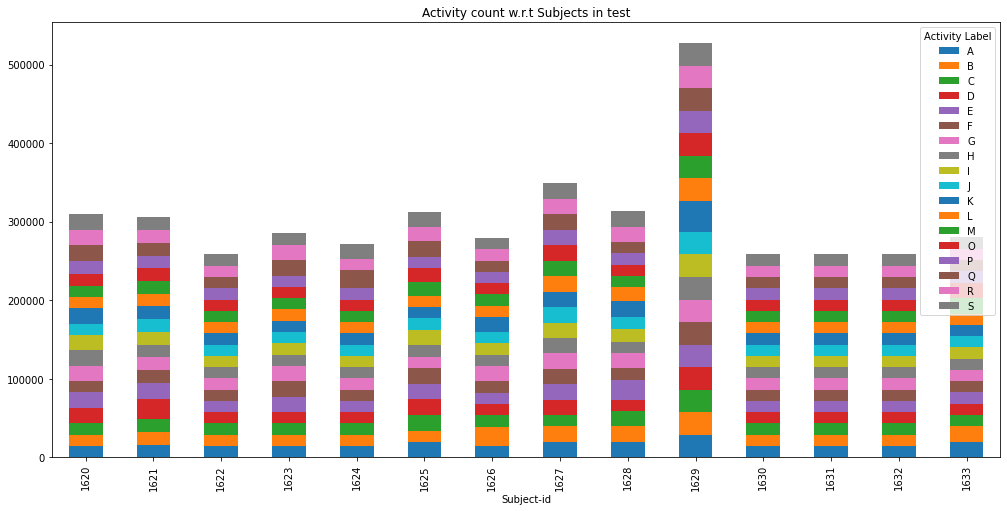

In [21]:
stack_group = test.groupby(['Subject-id','Activity Label']).size().unstack()
stack_group.plot(kind='bar',stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in test')
plt.show()

In [22]:
train = convert(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
test = convert(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
test.shape

(4266331, 6)

In [25]:
test.dtypes

Subject-id        float64
Activity Label      int64
Timestamp         float64
x                 float64
y                 float64
z                 float64
dtype: object

In [26]:
test.head()

,Subject-id,Activity Label,Timestamp,x,y,z
0,1621.0,1,1.772671e+14,-4.213646,-7.393744,2.106898
1,1621.0,1,1.772671e+14,-4.910358,-9.230097,0.617704
2,1621.0,1,1.772672e+14,-4.857686,-9.110387,2.248155
3,1621.0,1,1.772672e+14,-4.314202,-7.678654,3.311181
4,1621.0,1,1.772673e+14,-3.562422,-5.772869,4.359841


In [27]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)
data=pd.DataFrame()
data=pd.concat([train,test])

# Training

## Train-Test Split

In [28]:
y=data["Activity Label"]
x=data.drop(columns="Activity Label")
x_train, x_test, y_train, y_test = train_test_split(x,y , train_size = 0.7, random_state =  42)

## K-Nearest Neighbor Algorithm

In [29]:
import time
t0=time.time()
from sklearn.neighbors import KNeighborsClassifier
# K Nearest Neighbors
clf = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)



## Prediction

In [30]:
y_predict = clf.predict(x_test)
score = accuracy_score(y_test,y_predict)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.7691849656025955
Time taken : 281.4570748806


## Saving The Model

In [31]:
filename = 'knn_final.sav'
pickle.dump(clf, open(filename, 'wb'))

# Testing on Custom Data

In [39]:
#give the path
valid_path = 'drive/MyDrive/prithviai/Data/valid/'

In [ ]:
valid = mandatory(valid_path)
valid = convert(valid)

In [ ]:
valid = valid.sample(frac=1).reset_index(drop=True)
y_valid=valid["Activity Label"]
x_valid=valid.drop(columns="Activity Label")

In [ ]:
filename = 'knn_final.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_valid, y_valid)